# Substitution Cipher Statistical Attack

## Mahan Madani - 99222092

In [1]:
#!pip install pypdf

import pypdf
import os
import matplotlib.pyplot as plt
import re
import random

Most common bigrams (in order)
<br>th, he, in, en, nt, re, er, an, ti, es, on, at, se, nd, or, ar, al, te, co, de, to, ra, et, ed, it, sa, em, ro.
<br>Most common trigrams (in order)
<br>the, and, tha, ent, ing, ion, tio, for, nde, has, nce, edt, tis, oft, sth, men
<br>Most common quadrigrams (in order)
<br>that, ther, with, tion, here, ould, ight, have, hich, whic, this, thin, they, atio, ever, from, ough, were, hing, ment


## Step 0: Preparations and Utility Functions

In [2]:
english_alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
                    'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
                    'w', 'x', 'y', 'z']

**Utility function to extract text from a PDF**

In [3]:
def extract_text(pdfname):
    reader = pypdf.PdfReader(pdfname)
    text = ""
    for page in reader.pages:
        page_text = page.extract_text().lower()
        text += re.sub('[^a-z]', '', page_text)
        
    return text

**Read the texts to be used in this project from the provided files**

In [4]:
file1_plaintext = extract_text("Harry Potter and the Order of the Phoenix.pdf")
file2_plaintext = extract_text("Harry Potter and the Half-Blood Prince.pdf")

**This function analyses every character in the text to find the frequency of letters, bigrams, trigrams, and quadrigrams**

In [5]:
def analyse_text(text, alphabet, bigrams, trigrams, quadrigrams):
    for i in range(len(text)):
        
        if alphabet.get(text[i]) is not None:
            alphabet[text[i]] += 1
        
        if bigrams.get(text[i:i+2]) is not None:
            bigrams[text[i:i+2]] += 1
        else:
            bigrams.update({text[i:i+2]: 1})
            
        if trigrams.get(text[i:i+3]) is not None:
            trigrams[text[i:i+3]] += 1
        else:
            trigrams.update({text[i:i+3]: 1})
            
        if quadrigrams.get(text[i:i+4]) is not None:
            quadrigrams[text[i:i+4]] += 1
        else:
            quadrigrams.update({text[i:i+4]: 1})

**This function encrypts text based on a provided key. The Key should be a one-to-one dictionary mapping each letter of the english alphabet to another one.**

In [6]:
def generate_ciphertext(plaintext, secret_key):
    cipher_text = ""
    
    for i in range(len(plaintext)):
        cipher_text += secret_key.get(plaintext[i])

    return cipher_text

**Utility function for converting a dictionary to an ordered list (based on letter frequency)**

In [7]:
def convert_dict_to_ordered_list(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    result = []
    
    for i in range(len(values)):
        result.append([keys[i], values[i]])
        
    result.sort(key= lambda x: x[1], reverse=True)
    return result

**The Secret Key and the cracked keys are stored as dictionaries. This utility function prints an alphabetically ordered version of the key.**

In [8]:
def print_key(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    result = []
    
    for i in range(len(values)):
        result.append([keys[i], values[i]])

    result.sort(key= lambda x: x[0])
    
    for term in result:
        print(f"{term[0]} -> {term[1]}", end="    ")
    
    print()

**Utility function to compare two keys. Returns the number of differences between two keys.**

In [102]:
def compare_keys(key1, key2):
    
    diff_counter = 0
    
    for x in english_alphabet:
        if key1.get(x) is None or key2.get(x) is None:
            diff_counter += 1
        elif key1[x] != key2[x]:
            diff_counter += 1
    
    return f"{diff_counter} differences"

**This function deciphers text based on a key. The Inverse of the key is first calculated.**

In [121]:
def decipher_text(text, key):
    inverse_key = {}
    for key, value in key.items():
        inverse_key.update({value: key})
    
    deciphered_text = ""
    
    for i in range(len(text)):
        deciphered_char = inverse_key.get(text[i])
        if deciphered_char is not None:
            deciphered_text += deciphered_char
        else:
            deciphered_text += text[i]

    return deciphered_text

## Step 1: Extract and Analyze the Plaintext from the First File
In this step, the plaintext is extracted from a book and analysed. We'll use the data extracted from this book (Harry Potter and the Order of the Phoenix) to decipher the ciphertext (which is going to be Harry Potter and the Half-Blood Prince).
<br> After finding the frequency of each letter, the frequency of every possible bigram, trigram, and quadrigam is also found. Note that only the top 20 most common combinations from each category will be used.

In [10]:
plain_alphabet = {english_alphabet[j]: 0 for j in range(len(english_alphabet))}
plain_bigrams = {}
plain_trigrams = {}
plain_quadrigrams = {}

In [11]:
# The text from the first file (Harry Potter and the Order of the Phoenix.pdf) is used here.

analyse_text(file1_plaintext, plain_alphabet, plain_bigrams, plain_trigrams, plain_quadrigrams)

plain_alphabet    = convert_dict_to_ordered_list(plain_alphabet)
plain_bigrams     = convert_dict_to_ordered_list(plain_bigrams)
plain_trigrams    = convert_dict_to_ordered_list(plain_trigrams)
plain_quadrigrams = convert_dict_to_ordered_list(plain_quadrigrams)

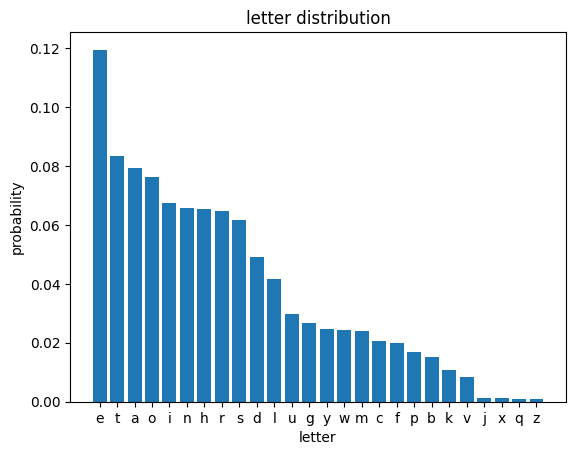

In [12]:
labels = [x[0] for x in plain_alphabet]
values = [x[1]/len(file1_plaintext) for x in plain_alphabet]

plt.bar(labels, values)

# Add a title and axis labels
plt.title("letter distribution")
plt.xlabel("letter")
plt.ylabel("probability")

plt.show()

## Step 2: Generate Ciphertext from the Second File
In this step, the plaintext is extracted from the second book similar to step 2. But before analysing the text, we need to encrypt it with a random key. I used the random.Shuffle() method to generate the secret key and stored it in a dictionary to easily encrypt the text.
<br> After the ciphertext is generated, it must be analysed so the frequency of the letters, bigrams, trigrams, and quadrigrams can be found.

In [13]:
secret_key = {}
temp = english_alphabet.copy()
random.shuffle(temp)

for i in range(len(english_alphabet)):
    secret_key.update({english_alphabet[i]: temp[i].upper()})

print("Secret Key:")
print_key(secret_key)

Secret Key:
a -> A    b -> H    c -> O    d -> U    e -> P    f -> R    g -> N    h -> L    i -> F    j -> G    k -> C    l -> K    m -> B    n -> D    o -> J    p -> S    q -> Z    r -> I    s -> E    t -> V    u -> M    v -> W    w -> Q    x -> T    y -> Y    z -> X    


In [14]:
cipher_alphabet = {english_alphabet[j].upper(): 0 for j in range(len(english_alphabet))}
cipher_bigrams = {}
cipher_trigrams = {}
cipher_quadrigrams = {}

In [15]:
cipher_text = generate_ciphertext(file2_plaintext, secret_key)
analyse_text(cipher_text, cipher_alphabet, cipher_bigrams, cipher_trigrams, cipher_quadrigrams)

cipher_alphabet    = convert_dict_to_ordered_list(cipher_alphabet)
cipher_bigrams     = convert_dict_to_ordered_list(cipher_bigrams)
cipher_trigrams    = convert_dict_to_ordered_list(cipher_trigrams)
cipher_quadrigrams = convert_dict_to_ordered_list(cipher_quadrigrams)

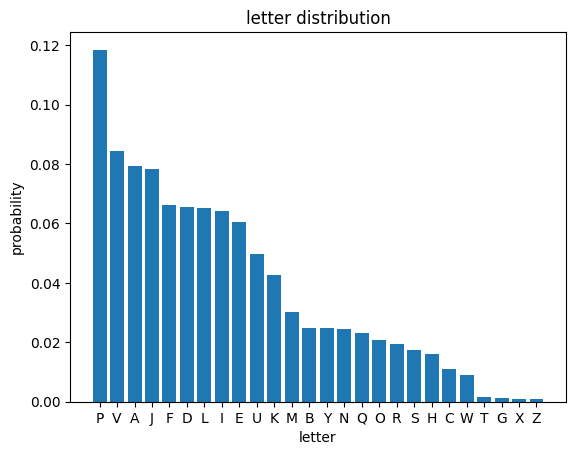

In [16]:
labels = [x[0] for x in cipher_alphabet]
values = [x[1]/len(cipher_text) for x in cipher_alphabet]

plt.bar(labels, values)

# Add a title and axis labels
plt.title("letter distribution")
plt.xlabel("letter")
plt.ylabel("probability")

plt.show()

## Step 3: Find The Key
Using the method discussed in class, we'll use the frequency of each plaintext letter to find its corresponding letter from the ciphertext. For Instance, the most common letter in the english alphabet is almsot always 'e', so the most common letter in ciphertext will correspond to 'e'. We can find the key using this method, although the resulting key needs to be manually checked to ensure it's correct.

### Find The Key Based On Letter Frequency

In [116]:
cracked_key_1 = {}

for a, b in zip(plain_alphabet, cipher_alphabet):
    cracked_key_1.update({a[0]: b[0]})

print("Cracked Key - 1:")
print_key(cracked_key_1)

print("\nSecret Key:")
print_key(secret_key)

print("\n" + compare_keys(cracked_key_1, secret_key))

Cracked Key - 1:
a -> A    b -> H    c -> O    d -> U    e -> P    f -> R    g -> B    h -> L    i -> F    j -> T    k -> C    l -> K    m -> Q    n -> D    o -> J    p -> S    q -> X    r -> I    s -> E    t -> V    u -> M    v -> W    w -> N    x -> G    y -> Y    z -> Z    

Secret Key:
a -> A    b -> H    c -> O    d -> U    e -> P    f -> R    g -> N    h -> L    i -> F    j -> G    k -> C    l -> K    m -> B    n -> D    o -> J    p -> S    q -> Z    r -> I    s -> E    t -> V    u -> M    v -> W    w -> Q    x -> T    y -> Y    z -> X    

7 differences


Looking at the results, we got **19** letters right and **7** letters wrong. Utilizing bigrams, trigrams, and quadrigrams, we might be able to get better results.
<br> Here's an example of a small section of the ciphertext decrypted by this key:

In [112]:
c = decipher_text(cipher_text[1100:1201], cracked_key_1)
p = file2_plaintext[1100:1201]
print(p)
print(c)

elvesilverandopalsthirteenthesecretriddlefourteenfelixfelicisfifteentheunbreakablevowsixteenaveryfros
elvesilverandopalsthirteenthesecretriddlefourteenfelijfelicisfifteentheunbreakablevomsijteenaveryfros


### Find The Key Based On All Available Data (Letters, Bigrams, Trigrams, Quadrigrams)

In [95]:
num = 20

bigram_key = {}
for i in range(num):
    a, b = plain_bigrams[i], cipher_bigrams[i]
    bigram_key.update({a[0]: b[0]})

trigram_key = {}
for i in range(num):
    a, b = plain_trigrams[i], cipher_trigrams[i]
    trigram_key.update({a[0]: b[0]})

quadrigram_key = {}
for i in range(num):
    a, b = plain_quadrigrams[i], cipher_quadrigrams[i]
    quadrigram_key.update({a[0]: b[0]})
    

print(f"{num} Most common bigrams:")
print_key(bigram_key)
print(f"\n{num} Most common trigrams:")
print_key(trigram_key)
print(f"\n{num} Most common quadrigrams:")
print_key(quadrigram_key)

20 Most common bigrams:
an -> AD    ar -> DN    at -> JI    ea -> DU    ed -> PU    er -> PI    es -> JD    ha -> LA    he -> VL    hi -> DV    in -> FD    nd -> PA    ng -> JM    nt -> EV    on -> PE    ou -> AI    re -> IP    st -> AV    th -> LP    to -> VJ    

20 Most common trigrams:
aid -> AFU    and -> ADU    arr -> LAV    ent -> VLF    ere -> YJM    har -> LAI    hat -> PIP    her -> LPI    hes -> VVL    his -> LFE    ing -> FDN    nth -> PDV    rry -> IIY    sai -> QAE    she -> DVL    tha -> VLA    the -> VLP    thi -> PVL    was -> EAF    you -> AII    

20 Most common quadrigrams:
arry -> AIIY    dthe -> UVLP    ethe -> PVLP    fthe -> KPUJ    harr -> LAII    here -> QFVL    ight -> JVLP    inga -> HKPU    ingt -> VVLP    nthe -> DVLP    ofth -> VLPB    othe -> JMKU    said -> EAFU    that -> VLAV    them -> VLFD    ther -> VLPI    thes -> BHKP    thin -> FNLV    tthe -> LPIP    with -> FDNV    


Looking at the results, both the bigrams and trigrams seem to be inaccurate as even in the top 20 most repeated values, there are several inconsistent results. For example, in "ea -> DU" and "ed -> PU", "e" is mapped to both "D" and "P", while "a" and "d" are both mapped to "U". The Quadrigrams seem to be much more consistent.

In [123]:
cracked_key_2 = {}

for key, value in zip(quadrigram_key.keys(), quadrigram_key.values()):
    for i in range(4):
        if key[i] not in cracked_key_2.keys() and value[i] not in cracked_key_2.values():
            cracked_key_2.update({key[i]: value[i]})
            
print_key(cracked_key_2)

a -> A    d -> U    e -> P    f -> K    h -> L    i -> F    n -> D    o -> J    r -> I    s -> E    t -> V    y -> Y    


Based on the 20 most common quadrigrams, these letters are mapped. We'll use the single letter frequencies to find the rest of the key.

In [124]:
for a, b in zip(plain_alphabet, cipher_alphabet):
    if a[0] not in cracked_key_2.keys() and b[0] not in cracked_key_2.values():
        cracked_key_2.update({a[0]: b[0]})
        
print("Cracked Key - 2:")
print_key(cracked_key_2)

print("\nSecret Key:")
print_key(secret_key)

print("\n" + compare_keys(cracked_key_2, secret_key))

Cracked Key - 2:
a -> A    b -> H    c -> O    d -> U    e -> P    f -> K    g -> B    h -> L    i -> F    j -> T    k -> C    m -> Q    n -> D    o -> J    p -> S    q -> X    r -> I    s -> E    t -> V    u -> M    v -> W    w -> N    x -> G    y -> Y    z -> Z    

Secret Key:
a -> A    b -> H    c -> O    d -> U    e -> P    f -> R    g -> N    h -> L    i -> F    j -> G    k -> C    l -> K    m -> B    n -> D    o -> J    p -> S    q -> Z    r -> I    s -> E    t -> V    u -> M    v -> W    w -> Q    x -> T    y -> Y    z -> X    

9 differences


Looking at the results, we got **17** letters right and **9** letters wrong.
<br> Here's an example of a small section of the ciphertext decrypted by this key:

In [125]:
c = decipher_text(cipher_text[1100:1201], cracked_key_2)
p = file2_plaintext[1100:1201]
print(p)
print(c)

elvesilverandopalsthirteenthesecretriddlefourteenfelixfelicisfifteentheunbreakablevowsixteenaveryfros
efvesifverandopafsthirteenthesecretriddfeRourteenRefijReficisRiRteentheunbreakabfevomsijteenaveryRros


**Important Note**
<br> Most of the incorrect mappings are the ones mapping an uncommon letter in the english alphabet, such as x, q, or j. Finding trigrams or quadrigrams containing these letters is also a rare event and heavily depends on the text that is being deciphered. <br>Ultimately, even with the 20 most common letters correctly substituted, we are able to understand the deciphered text almost as good as the actual plaintext. Finding a more accurate key requires a human familiar with the language to manually analyse the text and try different mappings for the uncommon letters.